In [1]:
import pandas as pd
dataset = pd.read_csv("Ts-OHLC.csv")
dataset

,Open,High,Low,Close
0,1410.60,1427.90,1408.30,1415.10
1,1421.00,1626.60,1416.15,1607.40
2,1632.55,1673.90,1613.05,1626.20
3,1627.75,1627.75,1574.60,1579.05
4,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2220,202.90,207.80,201.35,205.00
2221,206.00,206.85,202.05,202.95
2222,203.90,203.90,199.35,201.00
2223,200.00,222.00,196.00,218.35


In [2]:
column = "Close"

In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (2225, 1)


In [4]:
training_size = round(len(data1) * 0.95)
print(training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

2114
X_train length: (2114, 1)
X_test length: (111, 1)
y_train length: (2114, 1)
y_test length: (111, 1)


In [5]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

RMSE-Testset: 0.019965521884646877
maPe-Testset: 3594911186.748822
RMSE-Testset: 0.019966131106525013
maPe-Testset: 3599256534.347733
RMSE-Testset: 0.019965914240552884
maPe-Testset: 3566218263.1470942
RMSE-Testset: 0.019966131106525013
maPe-Testset: 3599256534.347733


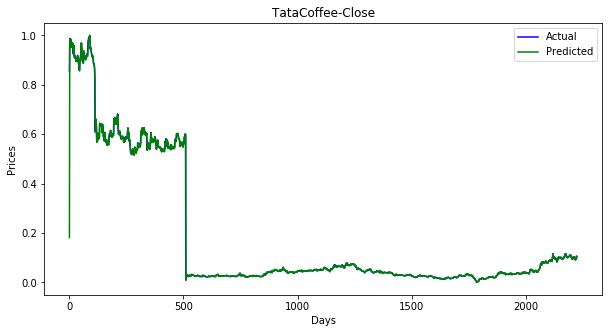

In [6]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [7]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [8]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

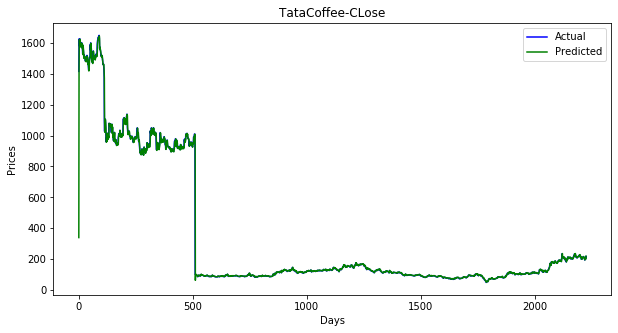

In [9]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [10]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 31.92185041311219
maPe-Testset: 0.020860807199032164


In [11]:
forecast=model_fit.predict(len(data1), len(data1)+200)

In [12]:
forecast

array([0.10199764, 0.10227282, 0.10254704, 0.10282032, 0.10309265,
       0.10336403, 0.10363448, 0.103904  , 0.10417258, 0.10444024,
       0.10470696, 0.10497277, 0.10523766, 0.10550163, 0.10576468,
       0.10602683, 0.10628807, 0.10654841, 0.10680785, 0.10706639,
       0.10732404, 0.10758079, 0.10783666, 0.10809165, 0.10834575,
       0.10859897, 0.10885132, 0.10910279, 0.1093534 , 0.10960313,
       0.10985201, 0.11010002, 0.11034718, 0.11059348, 0.11083893,
       0.11108353, 0.11132728, 0.1115702 , 0.11181227, 0.1120535 ,
       0.1122939 , 0.11253347, 0.11277222, 0.11301013, 0.11324722,
       0.1134835 , 0.11371895, 0.11395359, 0.11418742, 0.11442045,
       0.11465266, 0.11488407, 0.11511469, 0.1153445 , 0.11557352,
       0.11580175, 0.11602919, 0.11625584, 0.11648171, 0.1167068 ,
       0.11693111, 0.11715464, 0.1173774 , 0.11759939, 0.11782061,
       0.11804107, 0.11826077, 0.1184797 , 0.11869788, 0.11891531,
       0.11913198, 0.1193479 , 0.11956308, 0.11977751, 0.11999

In [13]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [14]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [15]:
forecast_stock_price_test_oriF

,Closefore
0,212.473832
1,212.913781
2,213.35221
3,213.789122
4,214.224523
...,...
196,275.176582
197,275.399699
198,275.622046
199,275.843623
